# Likelihoods check 

As the other `check_likelihood_curves` notebooks, but now with the $\chi$ parameteriation 

# Setup 

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

# Synthetic data 

We generate synthetic data to test our scheme. 

Lets make sure this looks reasonable 

In [21]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
import numpy as np 
from model import PhaseModel
from kalman_filter import KalmanFilter
from priors import bilby_priors_dict
import matplotlib.pyplot as plt 
P   = SystemParameters(σm=5e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    




def iterate_over_ll(data,parameter_name,parameter_value,P,PTA):
   

    #Define the model to be used by the Kalman Filter
    model = PhaseModel(P)


    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.phi_measured,PTA)



    inits, constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
    optimal_parameters = constrained_prior.sample(1)
    optimal_parameters[parameter_name] = np.array([parameter_value])
    ll,xresults,yresults = KF.likelihood(optimal_parameters)

    return ll 



# Omega 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

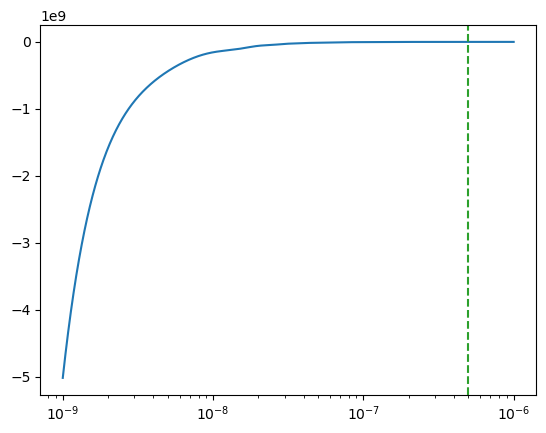

In [22]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "omega_gw"
N = 1000
parameter_values = np.logspace(-9,-6,N)


likelihoods_omega = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    print(i)
    likelihoods_omega[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_omega)
plt.axvline(5e-7,linestyle='--', c='C2')
plt.xscale('log')


(4e-07, 6e-07)

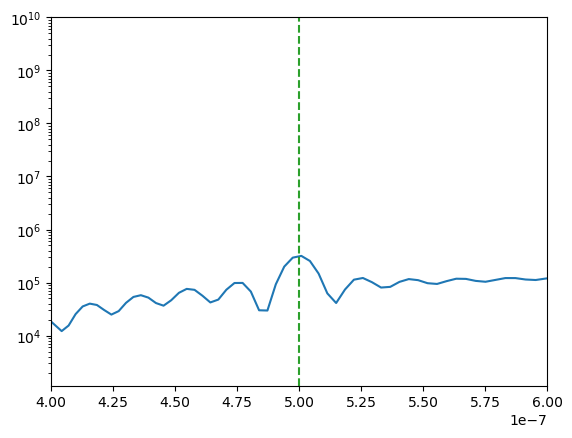

In [33]:
parameter_values = np.logspace(-9,-6,N)
plt.plot(parameter_values,np.abs(likelihoods_omega))
plt.axvline(5e-7,linestyle='--', c='C2')
#plt.xscale('log')
plt.yscale('log')
plt.xlim(4e-7,6e-7)

# phi 0

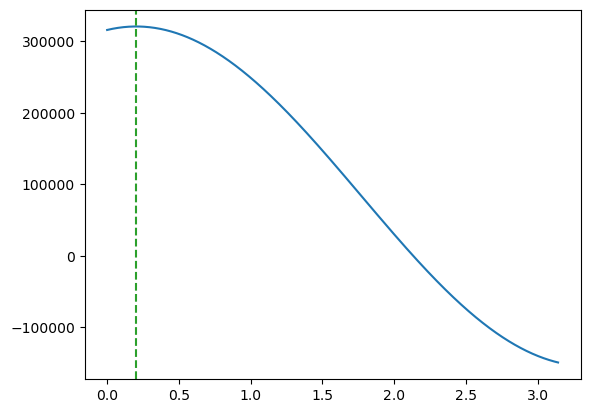

In [23]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "phi0_gw"
N = 1000
parameter_values = np.linspace(0,np.pi,N)


likelihoods_phi = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_phi[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)


plt.plot(parameter_values,likelihoods_phi)
plt.axvline(0.2,linestyle='--', c='C2')


# psi

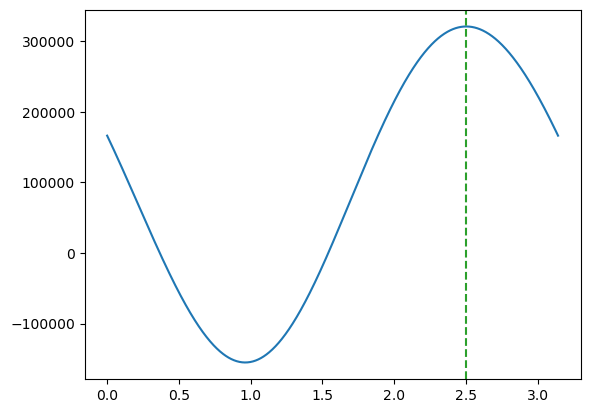

In [24]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "psi_gw"
N = 1000
parameter_values = np.linspace(0,np.pi,N)


likelihoods_psi = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_psi[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)


plt.plot(parameter_values,likelihoods_psi)
plt.axvline(2.50,linestyle='--', c='C2')


# Delta 

# Delta 

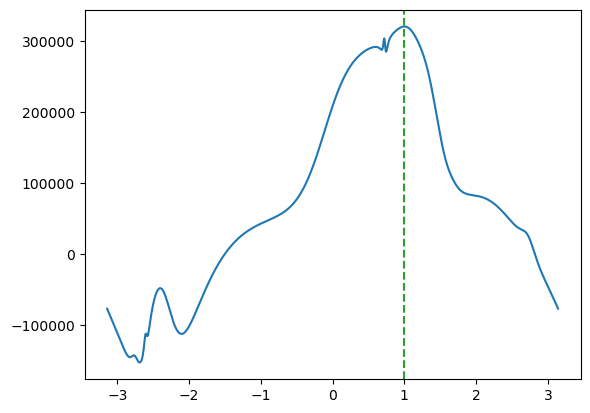

In [25]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "delta_gw"
N = 1000
parameter_values = np.linspace(-np.pi,np.pi,N)


likelihoods_delta = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_delta[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_delta)
plt.axvline(1.0,linestyle='--', c='C2')


# Alpha 

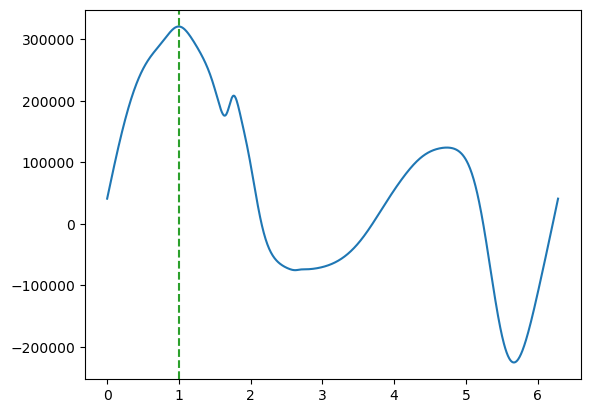

In [26]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "alpha_gw"
N = 1000
parameter_values = np.linspace(0.0,2*np.pi,N)


likelihoods_alpha = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_alpha[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_alpha)
plt.axvline(1.0,linestyle='--', c='C2')


# Iota 

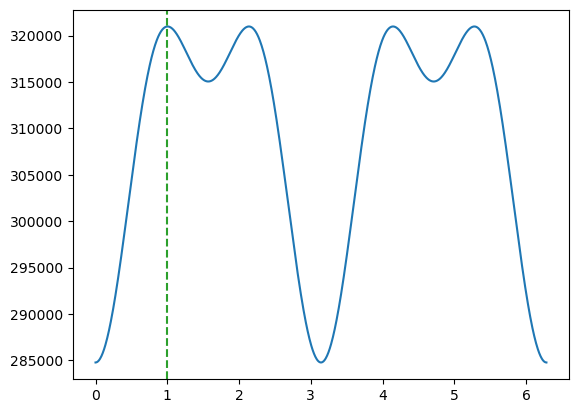

In [27]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "iota_gw"
N = 1000
parameter_values = np.linspace(0.0,2*np.pi,N)


likelihoods_iota = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_iota[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_iota)
plt.axvline(1.0,linestyle='--', c='C2')



# h 

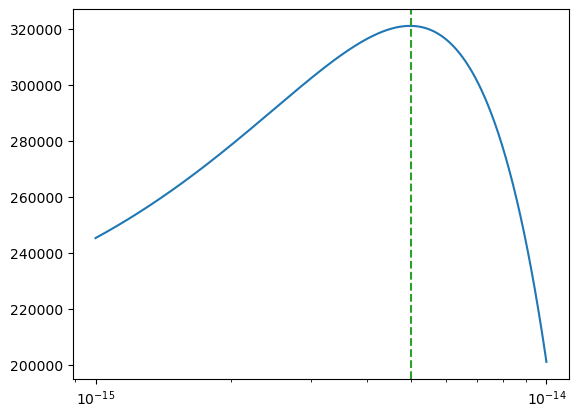

In [28]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "h"
N = 1000
parameter_values = np.logspace(-15,-14,N)


likelihoods_h = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_h[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_h)
plt.axvline(5e-15,linestyle='--', c='C2')
plt.xscale('log')
